In [135]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
from fractions import Fraction
from utils import get_image_path

In [136]:
def create_qpe(phase, total_counting_qubits=3):
    total_qubits = total_counting_qubits+1
    
    qc = QuantumCircuit(total_qubits, total_counting_qubits)
    qc.x(-1)
    qc.h(range(total_counting_qubits))
    
    repetitions = 1
    for qubit in range(total_counting_qubits):
        for _ in range(repetitions):
            qc.cp(phase, qubit, -1)
        repetitions *= 2
    
    qc.append(QFT(total_counting_qubits, inverse=True), range(total_counting_qubits))
    qc.measure(range(total_counting_qubits), range(total_counting_qubits))
    return qc

In [66]:
sim = AerSimulator()

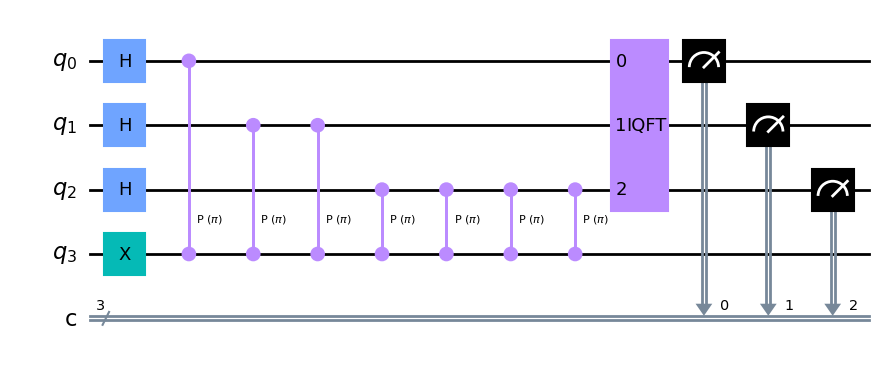

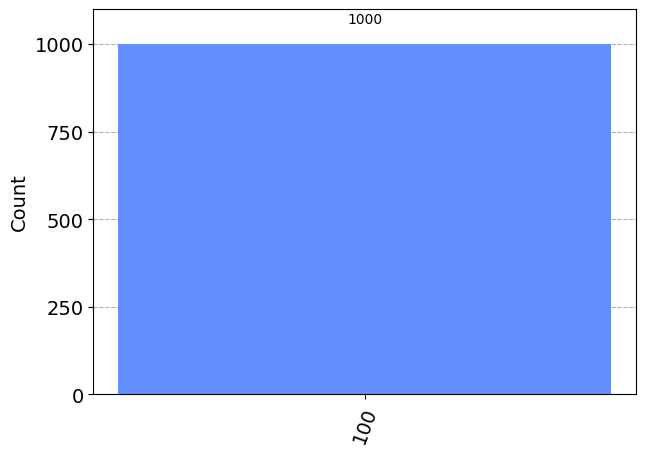

In [139]:
counting_qubits = 3
lambda_ = np.pi
qc = create_qpe(lambda_)
display(qc.draw('mpl', filename=get_image_path('qpe.png')))
job = sim.run(transpile(qc, sim), shots=1000).result().get_counts()
display(plot_histogram(job))

In [89]:
def get_theta(counting_qubits, counts):
    N = 2**(counting_qubits)
    estimated_value = int(max(counts, key=counts.get), 2)
    return Fraction(estimated_value, N)

In [128]:
theta = get_theta(counting_qubits, job)
theta

Fraction(1, 2)

${4 \over 2^3} = {4 \over 8} = {1 \over 2}$\
$2\pi i \theta = 2\pi i {1\over2} = \pi i$

In [91]:
def get_phi(counting_qubits, theta):
    fraction = Fraction(2*float(theta)).limit_denominator(2**counting_qubits)
    return float(fraction)*np.pi 

In [129]:
phi = get_phi(counting_qubits, theta)
phi

3.141592653589793

In [130]:
def check(phi):
    qc = QuantumCircuit(1)
    qc.x(0)
    qc.p(phi, 0)
    display(Statevector(qc).draw('latex'))

In [131]:
check(phi)

<IPython.core.display.Latex object>

---

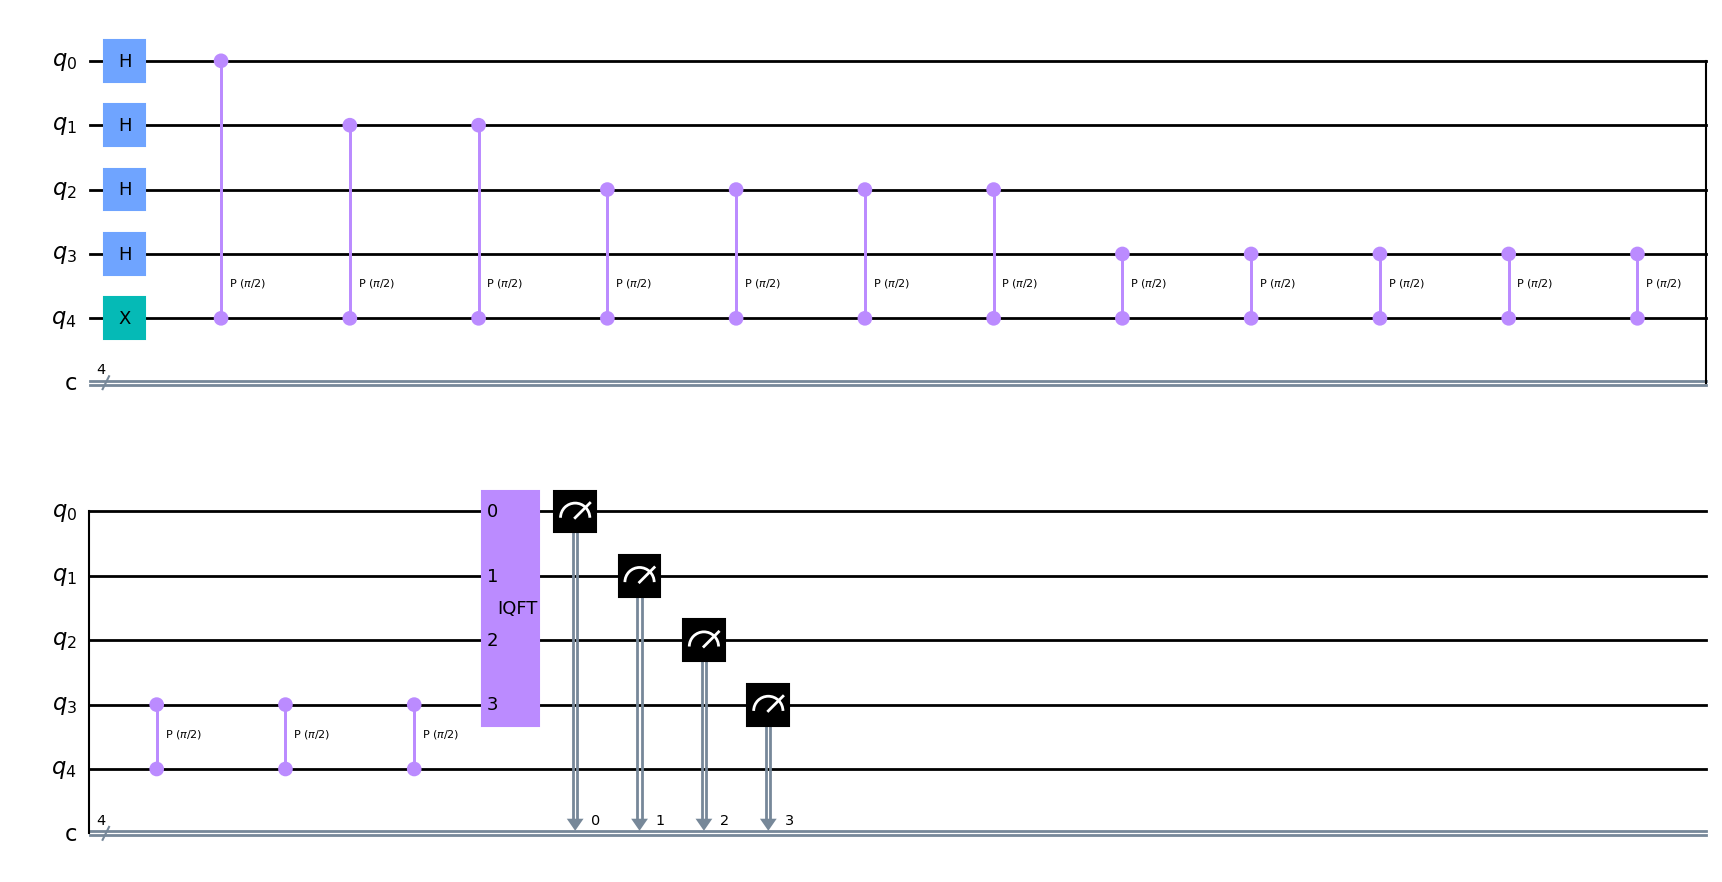

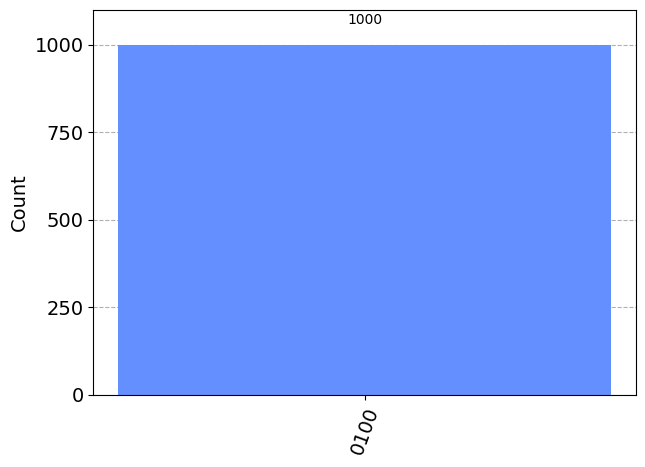

In [132]:
lambda_ = np.pi/2
counting_qubits = 4
qc = create_qpe(lambda_, counting_qubits)
job = sim.run(transpile(qc, sim), shots=1000).result().get_counts()
plot_histogram(job)

In [133]:
theta = get_theta(counting_qubits, job)
phi = get_phi(counting_qubits, theta)
print(f"theta: {theta}\nphi:{phi}")

theta: 1/4
phi:1.5707963267948966


In [134]:
check(phi)

<IPython.core.display.Latex object>